In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import statistics
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose

In [43]:
hotel_bookings = pd.read_csv("hotel_bookings.csv")

In [61]:
# Data Cleansing, columns not relevant to analysis removed
hotel_bookings_cleaned = hotel_bookings.drop(["meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "agent", "company", "days_in_waiting_list","required_car_parking_spaces", "reservation_status", "reservation_status_date", "is_repeated_guest", "deposit_type"], axis=1)

In [62]:
hotel_bookings_cleaned

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,customer_type,adr,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,Transient,0.00,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,Transient,0.00,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,Transient,75.00,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,Transient,75.00,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,Transient,98.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,Transient,96.14,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,Transient,225.43,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,Transient,157.71,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,Transient,104.40,0


In [14]:
# Booking Information - relevant columns
* Hotel H1 or H2
* Arrival Date
* Weekend stay
* Weekday stay
* Deposit type
* Average Daily rate
* Special Requests
* Lead time
* Cancelation


In [17]:
# Customer Information - relevant columns 
* Age (Adults, children, babies)
* Repeated guest
* Guest type


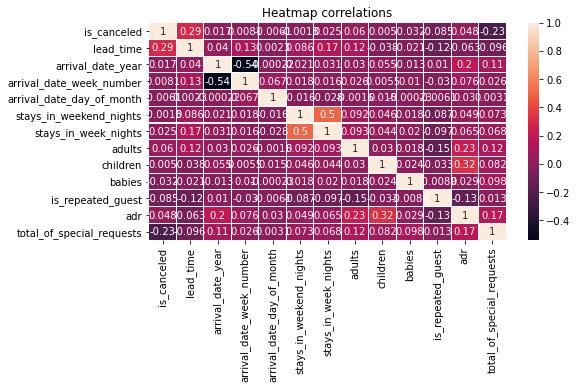

In [4]:
corr = hotel_bookings_cleaned.corr()
fig, ax = plt.subplots(figsize=(8,4)) 
sns.heatmap(corr, annot=True,linewidths=.1,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            ax=ax)
plt.title("Heatmap correlations")
plt.show()
#Heatmap showing correlations between all the columns of the cleaned dataframe

In [150]:
#Stronger positive correlations: Children/adr, adults/adr, lead_time/is_canceled
#Stronger negative correlations: is_canceled/total_of_special_requests

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,adr,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.047557,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,-0.063077,-0.095712
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,0.230641,0.122884
adr,0.047557,-0.063077,0.197580,0.075791,0.030245,0.049342,0.065237,0.230641,0.324854,0.029186,-0.134314,1.000000,0.172185
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,0.065237,0.068192
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,0.197580,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.075791,0.026149
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,0.324854,0.081745
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,0.049342,0.072671
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,0.030245,0.003062


Median:  267.0 Min:  -63.8 Max:  7590.0 IQR:  300.25


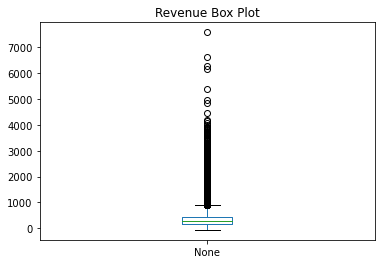

In [46]:
# Increasing Revenue
# Overall revenue analysis
total_nights_booked = hotel_bookings_cleaned["stays_in_weekend_nights"] + hotel_bookings_cleaned["stays_in_week_nights"]
revenue = total_nights_booked * hotel_bookings_cleaned["adr"]

rev_median = statistics.median(revenue)
rev_max = max(revenue)
rev_min = min(revenue)
rev_q1 = revenue.quantile(.25)
rev_q3 = revenue.quantile(.75)
rev_iqr = rev_q3 - rev_q1
print("Median: ", rev_median, "Min: ", rev_min, "Max: ", rev_max, "IQR: ", rev_iqr)
revenue.plot(kind="box", title="Revenue Box Plot")
# We can see that the revenue data has a large range, the values can vary from negative to very large
# This indicates that revenue is extremely variable, indicating that hotel demand is rather elastic

In [223]:
# Identify highest revenue customer base
# Separate different customer types
customer_base = hotel_bookings_cleaned["customer_type"]
transient = hotel_bookings_cleaned[hotel_bookings_cleaned["customer_type"]=="Transient"]
contract = hotel_bookings_cleaned[hotel_bookings_cleaned["customer_type"]=="Contract"]
transient_party = hotel_bookings_cleaned[hotel_bookings_cleaned["customer_type"]=="Transient-Party"]

In [57]:
#Transient Customer Analysis 
transient_stays = transient["stays_in_weekend_nights"] + transient["stays_in_week_nights"]
transient_rev = transient_stays * transient["adr"]
transient_rev_avg = round(statistics.mean(transient_rev), 2)
total_avg_rev_transient = round(transient_rev_avg * len(transient), 2)
print("AVG Revenue per Transient Customer:",
      transient_rev_avg, 
      'Total Transient Customers:', len(transient), 
      "Total AVG Revenue:", total_avg_rev_transient)

AVG Revenue per Transient Customer: 381.63 Total Transient Customers: 89613 Total AVG Revenue: 34199009.19


In [225]:
#Transient Party Analysis
transient_party_stays = transient_party["stays_in_weekend_nights"] + transient_party["stays_in_week_nights"]
transient_party_rev = transient_party_stays * transient_party["adr"]
transient_party_rev_avg = round(statistics.mean(transient_party_rev), 2)
total_avg_rev_transient_party = round(transient_party_rev_avg * len(transient_party), 2)
print("AVG Revenue per Transient Customer:",
      transient_party_rev_avg, 
      'Total Transient Party Customers:', len(transient_party), 
      "Total AVG Revenue:", total_avg_rev_transient_party)

AVG Revenue per Transient Customer: 260.49 Total Transient Party Customers: 25124 Total AVG Revenue: 6544550.76


In [59]:
#Contract Customer Analysis 
contract_stays = contract["stays_in_weekend_nights"] + contract["stays_in_week_nights"]
contract_rev = contract_stays * contract["adr"]
contract_rev_avg = round(statistics.mean(contract_rev),2)
total_avg_rev_contract = round(contract_rev_avg * len(contract), 2)
print("AVG Revenue per Contract Customer:",
      contract_rev_avg, 
      "Total Contract Customers:", len(contract), 
      "Total AVG Revenue:", total_avg_rev_contract)

AVG Revenue per Contract Customer: 451.2 Total Contract Customers: 4076 Total AVG Revenue: 1839091.2


Text(0.5, 1.0, 'Average Revenue per Customer Type')

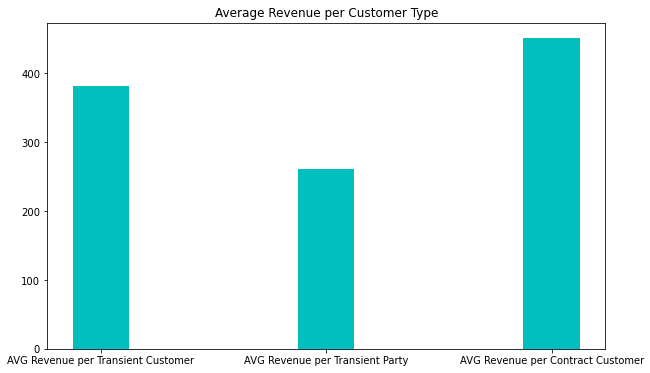

In [259]:
#Bar charts comparing the AVERAGE revenue per customer type
cust_labels = ['AVG Revenue per Transient Customer', 'AVG Revenue per Transient Party','AVG Revenue per Contract Customer']
cust_avgs = [transient_rev_avg, transient_party_rev_avg, contract_rev_avg]
plt.figure(figsize=(10, 6))
plt.bar(cust_labels, cust_avgs, color="c", width=.25)
plt.title('Average Revenue per Customer Type')

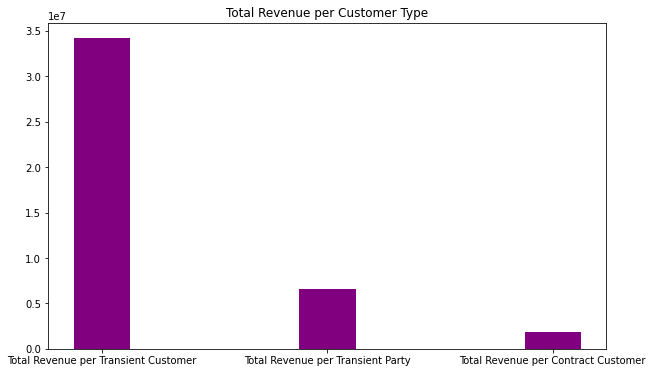

In [255]:
#Bar chart showing the TOTAL revenue per customer type
cust_labels = ['Total Revenue per Transient Customer', 'Total Revenue per Transient Party','Total Revenue per Contract Customer']
cust_totals = [total_avg_rev_transient, total_avg_rev_transient_party, total_avg_rev_contract]
plt.figure(figsize=(10, 6))
plt.bar(cust_labels, cust_totals, color="purple", width=.25)
plt.title('Total Revenue per Customer Type')
plt.show()


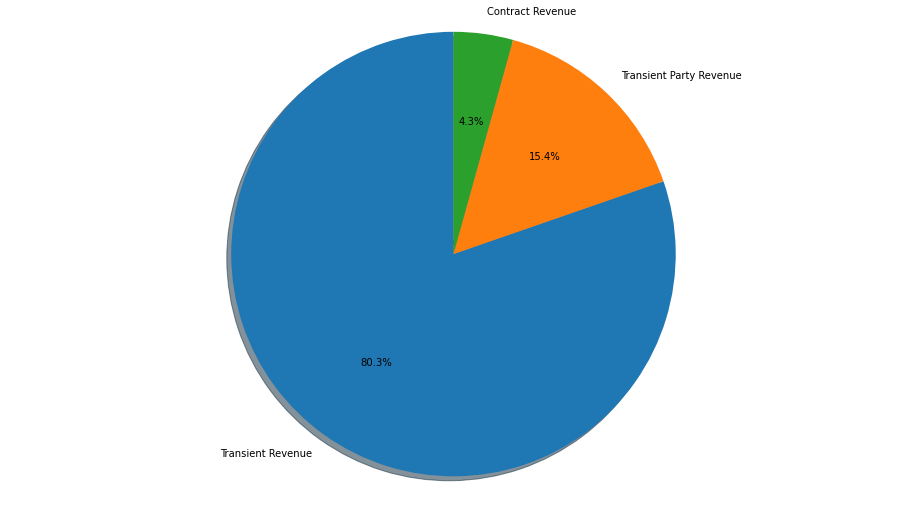

In [230]:
#Pie chart showing the percentage of the overall revenue each customer type represents 
labels = 'Transient Revenue', 'Transient Party Revenue','Contract Revenue'
sizes = [total_avg_rev_transient, total_avg_rev_transient_party, total_avg_rev_contract]
plt.rcParams["figure.figsize"] = [16,9]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [231]:
#transient customers are majority, about 80% of overall revenue, but at a lower rate, form greater portion of overall revenue
#transient parties make up 15%
#contract customers have higher adr, but only make up 4% of overall revenue

In [74]:
#Convert separate columns into one datetime dataframe
booking_date = pd.DataFrame({'day': hotel_bookings_cleaned["arrival_date_day_of_month"],
                             'month': hotel_bookings_cleaned["arrival_date_month"],
                             'year': hotel_bookings_cleaned["arrival_date_year"]})
dates = pd.to_datetime(booking_date.astype(str).agg('-'.join, axis=1), format='%d-%B-%Y')

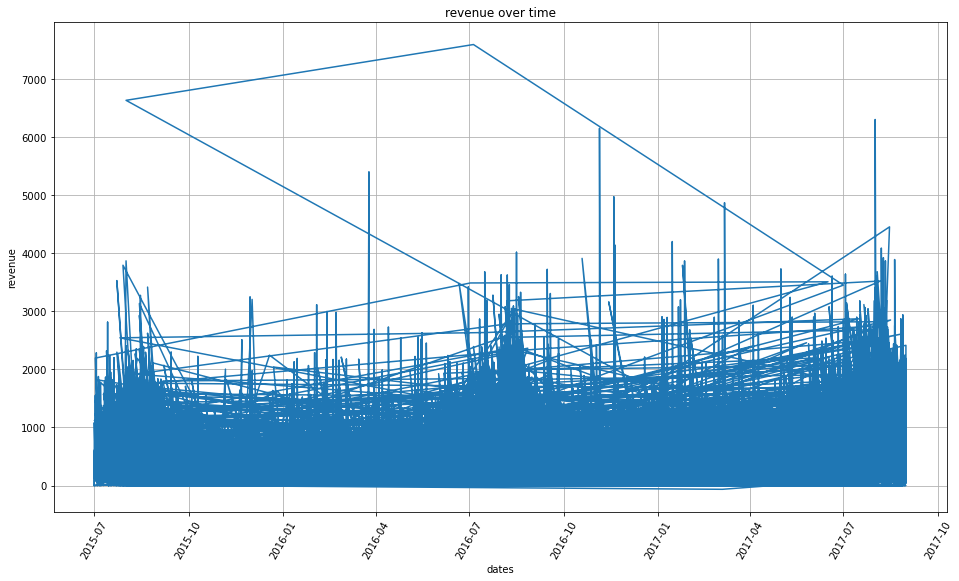

In [278]:
#Plot revenue over time
dates = pd.to_datetime(booking_date.astype(str).agg('-'.join, axis=1), format='%d-%B-%Y')
revenue = total_nights_booked * hotel_bookings_cleaned["adr"]
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
ax.plot(dates, revenue)
ax.set(xlabel='dates', ylabel='revenue',
       title='revenue over time')
ax.grid()
plt.xticks(rotation = 60)
plt.show()

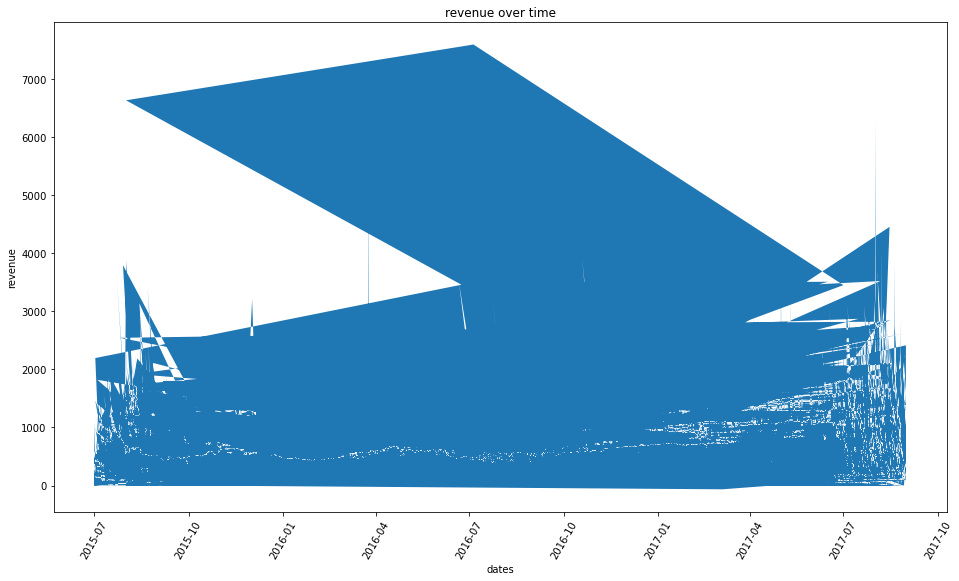

In [283]:
#Revenue over time as area chart 
fig, ax = plt.subplots()
ax.fill_between(dates, revenue)
ax.set(xlabel='dates', ylabel='revenue',
       title='revenue over time')
plt.xticks(rotation = 60)
plt.show()


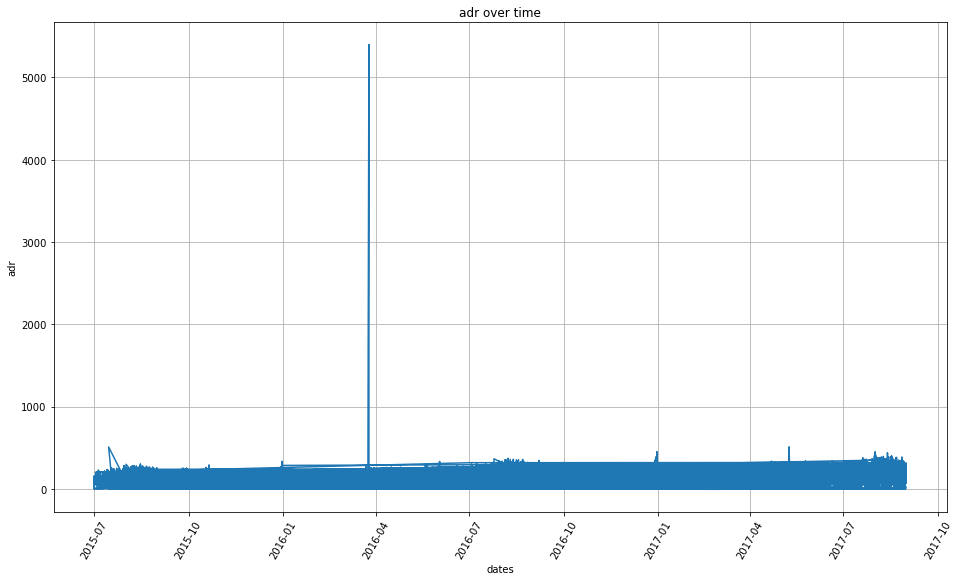

In [53]:
#Plot adr over time
adr = hotel_bookings_cleaned["adr"]
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
ax.plot(dates, adr)

ax.set(xlabel='dates', ylabel='adr',
       title='adr over time')
ax.grid()
plt.xticks(rotation = 60)
plt.show()


In [66]:
# Identify optimal daily rate

In [70]:
revenue.corr(adr)
#Revenue and adr are positively correlated, but not strongly (<.7) 

0.5657664741293615

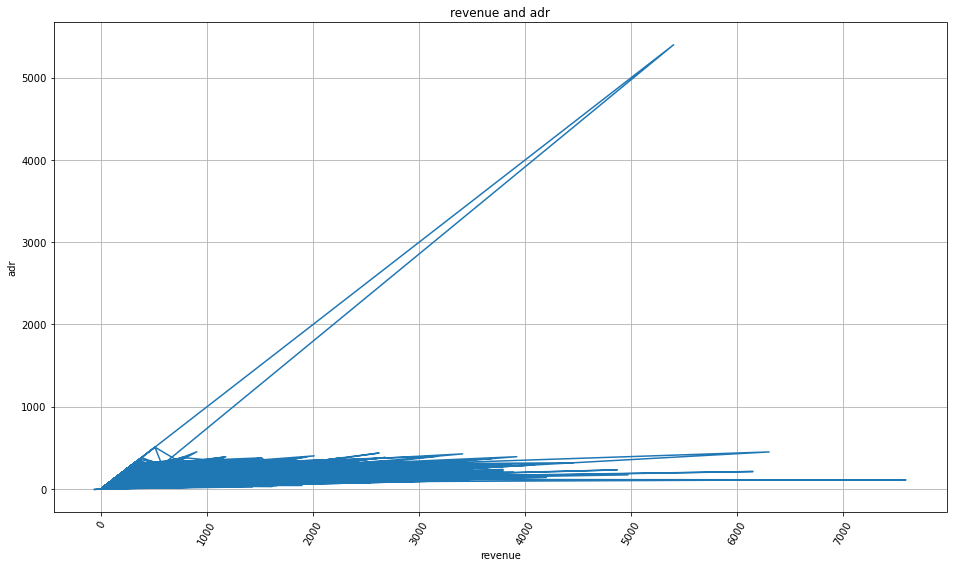

In [65]:
#Plotting adr against revenue 
adr = hotel_bookings_cleaned["adr"]
plt.rcParams["figure.figsize"] = [16,9]
fig, ax = plt.subplots()
ax.plot(revenue, adr)

ax.set(xlabel='revenue', ylabel='adr',
       title='revenue and adr')
ax.grid()
plt.xticks(rotation = 60)
plt.show()
#Adr fairly consistent over time, with a few outliers. 

In [ ]:
# Decreasing Costs 

In [188]:
# Identify times of year with most special requests 
#clean data to only select special request information 
special_requests = hotel_bookings_cleaned.drop(["is_canceled","lead_time","arrival_date_year",'arrival_date_week_number', "stays_in_weekend_nights", "stays_in_week_nights","adults","children", "babies","customer_type","adr", "arrival_date_day_of_month"], axis=1)

In [190]:
special_requests

,hotel,arrival_date_month,total_of_special_requests
0,Resort Hotel,July,0
1,Resort Hotel,July,0
2,Resort Hotel,July,0
3,Resort Hotel,July,0
4,Resort Hotel,July,1
...,...,...,...
119385,City Hotel,August,0
119386,City Hotel,August,2
119387,City Hotel,August,4
119388,City Hotel,August,0


In [203]:
#Establish values to plot
special_requests_jan = special_requests[(special_requests["arrival_date_month"]=='January')==True]
jan_total = sum(special_requests_jan["total_of_special_requests"])

special_requests_feb = special_requests[(special_requests["arrival_date_month"]=='February')==True]
feb_total = sum(special_requests_feb["total_of_special_requests"])

special_requests_mar = special_requests[(special_requests["arrival_date_month"]=='March')==True]
mar_total = sum(special_requests_mar["total_of_special_requests"])

special_requests_apr = special_requests[(special_requests["arrival_date_month"]=='April')==True]
apr_total = sum(special_requests_apr["total_of_special_requests"])

special_requests_may = special_requests[(special_requests["arrival_date_month"]=='May')==True]
may_total = sum(special_requests_may["total_of_special_requests"])

special_requests_jun = special_requests[(special_requests["arrival_date_month"]=='June')==True]
jun_total = sum(special_requests_jun["total_of_special_requests"])

special_requests_jul = special_requests[(special_requests["arrival_date_month"]=='July')==True]
jul_total = sum(special_requests_jul["total_of_special_requests"])

special_requests_aug = special_requests[(special_requests["arrival_date_month"]=='August')==True]
aug_total = sum(special_requests_aug["total_of_special_requests"])

special_requests_sep = special_requests[(special_requests["arrival_date_month"]=='September')==True]
sep_total = sum(special_requests_sep["total_of_special_requests"])

special_requests_oct = special_requests[(special_requests["arrival_date_month"]=='October')==True]
oct_total = sum(special_requests_oct["total_of_special_requests"])

special_requests_nov = special_requests[(special_requests["arrival_date_month"]=='November')==True]
nov_total = sum(special_requests_nov["total_of_special_requests"])

special_requests_dec = special_requests[(special_requests["arrival_date_month"]=='December')==True]
dec_total = sum(special_requests_dec["total_of_special_requests"])

In [204]:
#Compile values into a list 
spec_req_list = [jan_total, feb_total, mar_total, apr_total, may_total, jun_total, jul_total, aug_total, sep_total, oct_total, nov_total, dec_total]

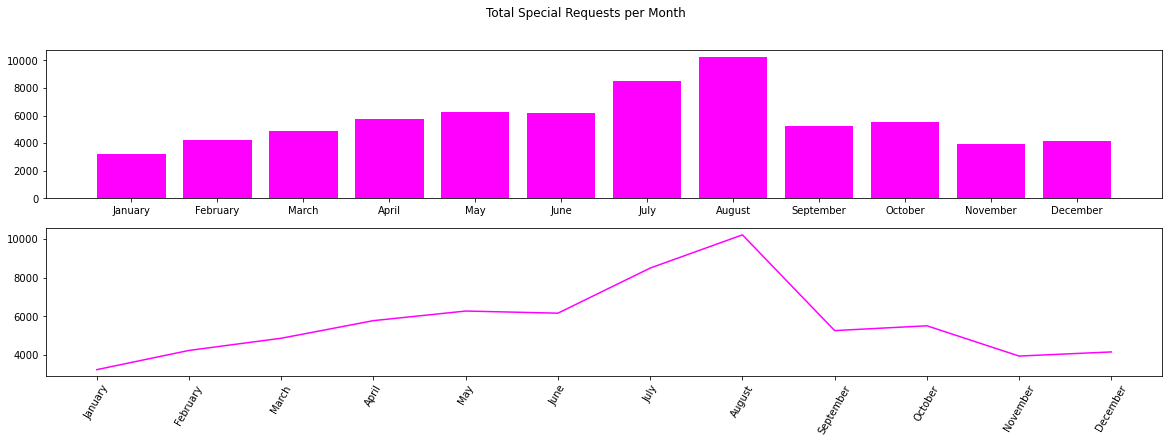

In [210]:
#Line and bar chart showing the number of special requests per month 
plt.figure(figsize=(20, 6))
plt.subplot(211)
plt.bar(names, spec_req_list, color="magenta")
plt.subplot(212)
plt.plot(names, spec_req_list, color="magenta")
plt.suptitle('Total Special Requests per Month')
plt.xticks(rotation = 60)
plt.show()

In [65]:
#  Identify lead time that leads to highest cancellation rates

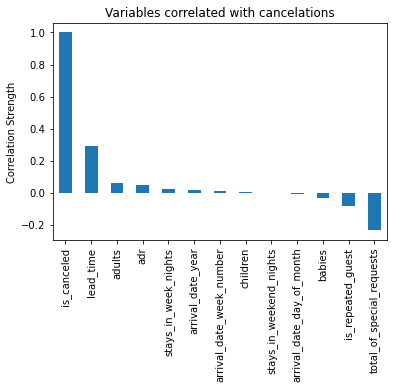

In [135]:
#Rank values correlated with cancelations 
corr_canceled = corr.sort_values("is_canceled", ascending=False)
corr_canceled['is_canceled'].plot(kind='bar')
plt.title("Variables correlated with cancelations")
plt.ylabel("Correlation Strength")
plt.show()
#the variable that has the highest positive correlation with cancelations is lead_time 
#higher lead times lead to higheer cancelations
#strongest negative corelation with total_of_special_requests

In [119]:
is_canceled = hotel_bookings_cleaned[hotel_bookings_cleaned['is_canceled']==1]
lead_time = hotel_bookings_cleaned['lead_time']

In [171]:
# Identify times of year with most cancellations
is_canceled_jan = print(len(is_canceled[is_canceled["arrival_date_month"]=='January']))
is_canceled_feb = print(len(is_canceled[is_canceled["arrival_date_month"]=='February']))
is_canceled_mar = print(len(is_canceled[is_canceled["arrival_date_month"]=='March']))
is_canceled_apr = print(len(is_canceled[is_canceled["arrival_date_month"]=='April']))
is_canceled_may = print(len(is_canceled[is_canceled["arrival_date_month"]=='May']))
is_canceled_jun = print(len(is_canceled[is_canceled["arrival_date_month"]=='June']))
is_canceled_jul = print(len(is_canceled[is_canceled["arrival_date_month"]=='July']))
is_canceled_aug = print(len(is_canceled[is_canceled["arrival_date_month"]=='August']))
is_canceled_sep = print(len(is_canceled[is_canceled["arrival_date_month"]=='September']))
is_canceled_oct = print(len(is_canceled[is_canceled["arrival_date_month"]=='October']))
is_canceled_nov = print(len(is_canceled[is_canceled["arrival_date_month"]=='November']))
is_canceled_dec = print(len(is_canceled[is_canceled["arrival_date_month"]=='December']))

1807
2696
3149
4524
4677
4535
4742
5239
4116
4246
2122
2371


In [170]:
total_cancelations_per_month = [1807, 2696, 3149, 4524, 4677, 4535, 4742, 5239, 4116, 4246, 2122, 2371]
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

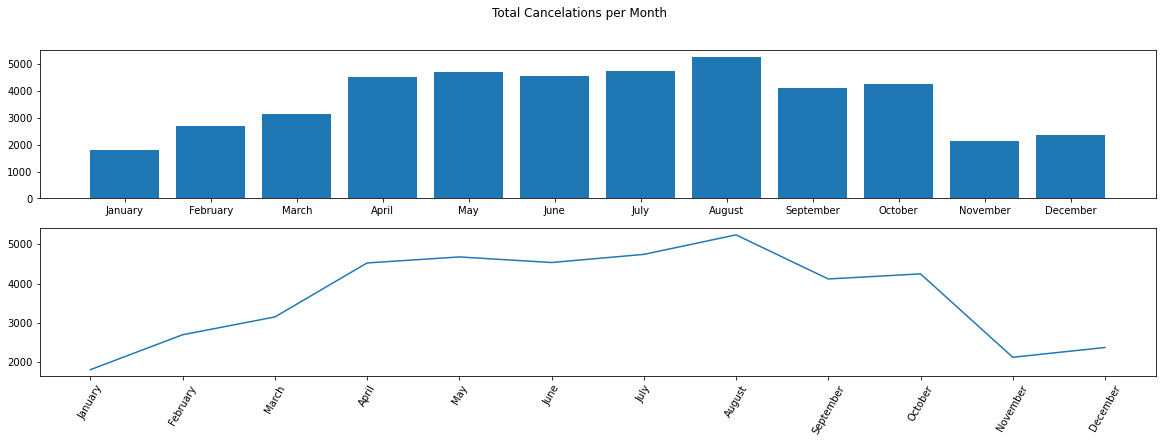

In [169]:
#Cancelations per month are plotted. 
values = [1807, 2696, 3149, 4524, 4677, 4535, 4742, 5239, 4116, 4246, 2122, 2371]
names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(20, 6))
plt.subplot(211)
plt.bar(names, values)
plt.subplot(212)
plt.plot(names, values)
plt.suptitle('Total Cancelations per Month')
plt.xticks(rotation = 60)
plt.show()

In [19]:
# Insights
#Stronger positive correlations: 
# Children/adr, adults/adr, have positive correlations because the more guests in the room (more children/adults) means
#more rooms may be booked and thus the rate increases

#lead_time/is_canceled have a stronger positive correlation because the higher the lead time to the reservation, the more
#time between the booking and check in date, the more likely plans are to change

#Stronger negative correlations: is_canceled/total_of_special_requests
# When more special requests are made, there are fewer cancelations, likely because the guest becomes more invested
#when they take the time to make more special requests 

#Transient customers make up the majority of revenue, followed by transient-group, the contract
#Revenue per customer is highest for contract parties 

#July and August see the most sepcial requests 
#Cancelations are consistent throughout most of the year but are lower in the winter months